In [1]:
import os
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch import multiprocessing
# multiprocessing.set_start_method('forkserver')
from torch.utils.data import DataLoader
from LatentPixel import TGraph, init_render, get_pixel_pretrain_dataloader, ModelType, RenderConfig, LPixelForPreTraining
from tqdm import tqdm

from datasets import load_dataset
from LatentPixel import get_pixel_pretrain_dataloader

In [2]:
_ = init_render(RenderConfig(dpi=240, pixels_per_patch=32))

In [7]:
dataloader = get_pixel_pretrain_dataloader(
        paths=['storage/enwiki/', 'storage/bookcorpus'],
        batch_size=2, 
        num_workers=8, 
        min_len=600,
        seed=42,
        model_type=None,
        render_config=RenderConfig(dpi=240, pixels_per_patch=32)
)

Datasets loaded from ['storage/bookcorpus', 'storage/enwiki/']
Convert the dataset into a streaming dataset
128
128
Begin to interleave datasets
<function get_pixel_pretrain_dataloader at 0x7f00abcb6d40> used 2.712045431137085 seconds.


In [8]:
batches = []
idx = 0
for batch in dataloader:
    idx += 1
    batches.append(batch)
    if idx > 5:
        break

pid 2853849's current affinity mask: 1000000001
pid 2853849's new affinity mask: ffffffffff
pid 2854228's current affinity mask: 1000000001
pid 2854228's new affinity mask: ffffffffff
pid 2853989's current affinity mask: 1000000001
pid 2853989's new affinity mask: ffffffffff
pid 2853912's current affinity mask: 1000000001
pid 2853912's new affinity mask: ffffffffff
pid 2854164's current affinity mask: 1000000001
pid 2854164's new affinity mask: ffffffffff
pid 2854101's current affinity mask: 1000000001
pid 2854101's new affinity mask: ffffffffff
pid 2853975's current affinity mask: 1000000001
pid 2853975's new affinity mask: ffffffffff
pid 2854165's current affinity mask: 1000000001
pid 2854165's new affinity mask: ffffffffff


In [9]:
smask = batch.get_span_mask()
smask.shape

torch.Size([2, 529])

In [10]:
smask[0]

tensor([0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
        1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,

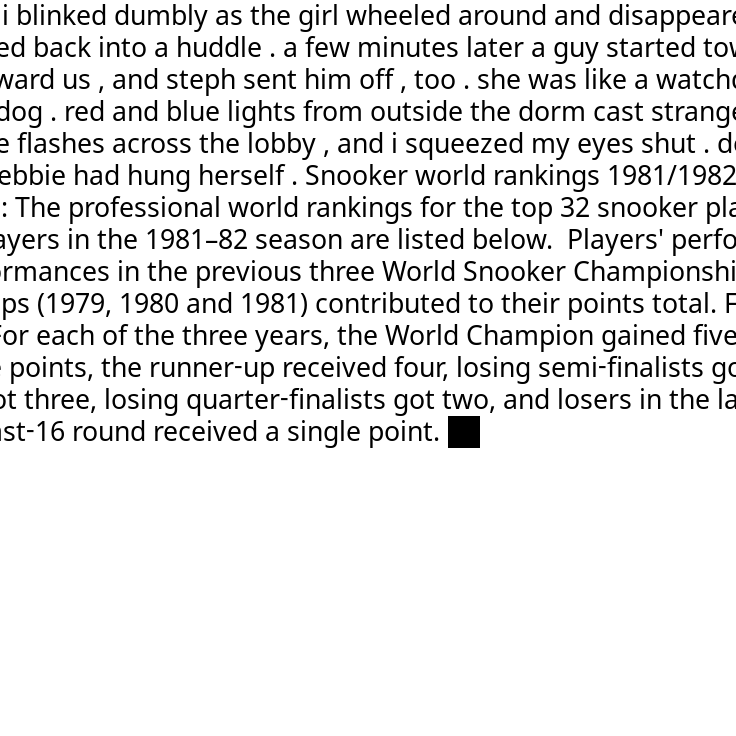

In [11]:
batch.squarelize().to_PIL()[0]

In [24]:
img = batches[0]._value[:, :, :, :32]

In [25]:
img.shape

torch.Size([5, 3, 32, 32])

In [22]:
batches[0].unsquarelize()

In [36]:
batch = batches[1]

In [6]:
batch = next(iter(dataloader))

pid 4116485's current affinity mask: 1000000001
pid 4116485's new affinity mask: ffffffffff
pid 4116765's current affinity mask: 1000000001
pid 4116765's new affinity mask: ffffffffff
pid 4116611's current affinity mask: 1000000001
pid 4116611's new affinity mask: ffffffffff
pid 4116421's current affinity mask: 1000000001
pid 4116421's new affinity mask: ffffffffff
pid 4116707's current affinity mask: 1000000001
pid 4116707's new affinity mask: ffffffffff
pid 4116484's current affinity mask: 1000000001
pid 4116484's new affinity mask: ffffffffff
pid 4116548's current affinity mask: 1000000001
pid 4116548's new affinity mask: ffffffffff
pid 4116800's current affinity mask: 1000000001
pid 4116800's new affinity mask: ffffffffff


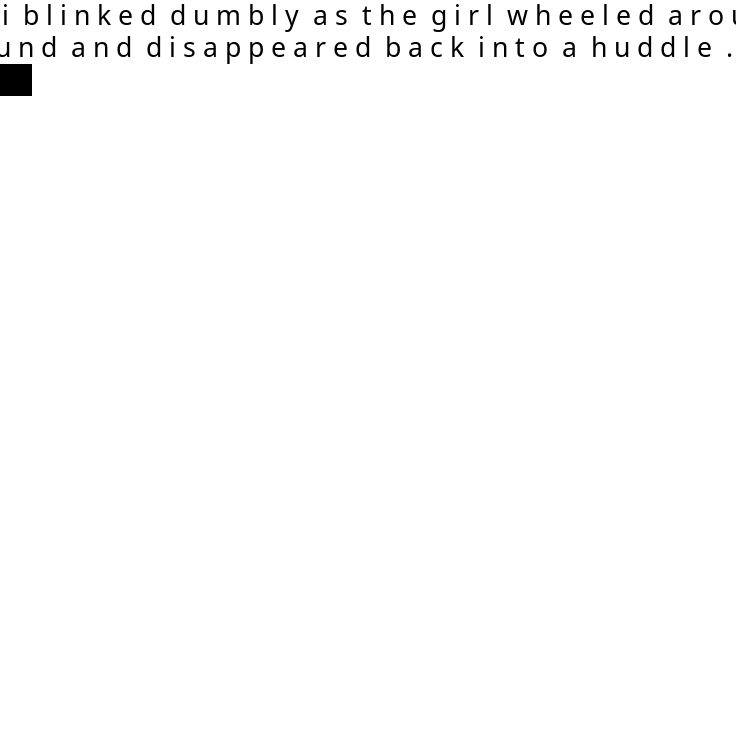

In [5]:
batch.squarelize().to_PIL()[0]

In [12]:
model = LPixelForPreTraining(ModelType.SD, 0.25, [4, 32 * 529 // 8], 4, 'storage/pixel-base', 'storage/SD2_VQGAN', keep_decoder=True, init_connection_layer=True)


Some weights of PIXELForPreTraining were not initialized from the model checkpoint at storage/pixel-base and are newly initialized because the shapes did not match:
- vit.embeddings.patch_embeddings.projection.weight: found shape torch.Size([768, 3, 16, 16]) in the checkpoint and torch.Size([768, 4, 4, 4]) in the model instantiated
- decoder.decoder_pred.weight: found shape torch.Size([768, 512]) in the checkpoint and torch.Size([64, 512]) in the model instantiated
- decoder.decoder_pred.bias: found shape torch.Size([768]) in the checkpoint and torch.Size([64]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Reinitialize the connection layers


In [27]:
recon = model.coder(img)

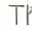

In [35]:
recongraph = TGraph.from_SD(recon.sample)
recongraph.to_PIL()[4]

In [25]:
with open('storage/checkpoints/lpixel_pretrain/lpixel_pretrain/LPixelForPreTraining/20230717-042415/32000/backbone/pytorch_model.bin', 'rb') as f:
    model.pixel.load_state_dict(torch.load(f, map_location='cpu'))

In [3]:
text = ' '.join('Alice was everywhere, until she wasn’t. Just like at first, she was nowhere until she was. The absence of her before I knew she existed, was nothing. Now, the absence of her shrouds everything. Like a guest who never came to dinner; a stormy sky that didn’t deliver. Nothing can wash away the void where she used to be. This is what I’m thinking about the first time I take The Walk without her. I met Alice at a dinner party, the raucous kind with wild guests, beautiful people glittering in late summer air on a second-floor balcony backlit by a September sky. We were all friends of Richard, and this was his brilliant attempt to make all the people I love come together. Or it was a lavish birthday party thrown for himself. You could never quite tell with Richard. He was my hairdresser, but I was included among the people he loved the most, and so was Alice. From across the table, her eyes kept locking mine with interest: hers large and dark and layered with mischief. Her husband was older, serene. A balm to her boisterousness.')
print(text)

A l i c e   w a s   e v e r y w h e r e ,   u n t i l   s h e   w a s n ’ t .   J u s t   l i k e   a t   f i r s t ,   s h e   w a s   n o w h e r e   u n t i l   s h e   w a s .   T h e   a b s e n c e   o f   h e r   b e f o r e   I   k n e w   s h e   e x i s t e d ,   w a s   n o t h i n g .   N o w ,   t h e   a b s e n c e   o f   h e r   s h r o u d s   e v e r y t h i n g .   L i k e   a   g u e s t   w h o   n e v e r   c a m e   t o   d i n n e r ;   a   s t o r m y   s k y   t h a t   d i d n ’ t   d e l i v e r .   N o t h i n g   c a n   w a s h   a w a y   t h e   v o i d   w h e r e   s h e   u s e d   t o   b e .   T h i s   i s   w h a t   I ’ m   t h i n k i n g   a b o u t   t h e   f i r s t   t i m e   I   t a k e   T h e   W a l k   w i t h o u t   h e r .   I   m e t   A l i c e   a t   a   d i n n e r   p a r t y ,   t h e   r a u c o u s   k i n d   w i t h   w i l d   g u e s t s ,   b e a u t i f u l   p e o p l e   g l i t t e r i n g   i n   l a t e   s u 

In [6]:
img = TGraph.from_text(text)
print(img._value.shape)

torch.Size([3, 32, 16928])


In [15]:
model.coder.eval()
model.pixel.train()
pixel_values = batch.unsquarelize().to_SD()
attention_mask = batch.get_attention_mask()
patch_mask = batch.get_span_mask()

In [8]:
pixel_values.shape

torch.Size([3, 32, 16928])

In [30]:
rgraph = TGraph.reconstruct(img, generated=TGraph.from_SD(con))
rgraph.to_PIL()[0]

NameError: name 'con' is not defined

In [51]:
pixel_values.shape

torch.Size([3, 32, 16928])

In [16]:
result = model.forward(pixel_values, attention_mask, patch_mask=patch_mask)

/work/sc118/sc118/yintaotai/miniconda3/envs/pt2hfpy310/lib/python3.10/site-packages/transformers/modeling_utils.py:884: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


In [18]:
result.loss

tensor(1.1069, grad_fn=<DivBackward0>)

In [19]:
rimg = TGraph.from_SD(result.logits, True)
rimg._mask = result.mask

In [20]:
batch._attention_mask = None

In [20]:
batch._value.shape

torch.Size([1, 3, 32, 16928])

In [21]:
batch._value = batch._value[0]
rimg._value = rimg._value[0]
batch.num_text_patches = batch.num_text_patches[0]

In [22]:
recon = TGraph.reconstruct(batch, rimg)

torch.Size([2, 529])


In [28]:
patch_mask[0][23: 46]

tensor([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1])

In [26]:
23 * 23

529

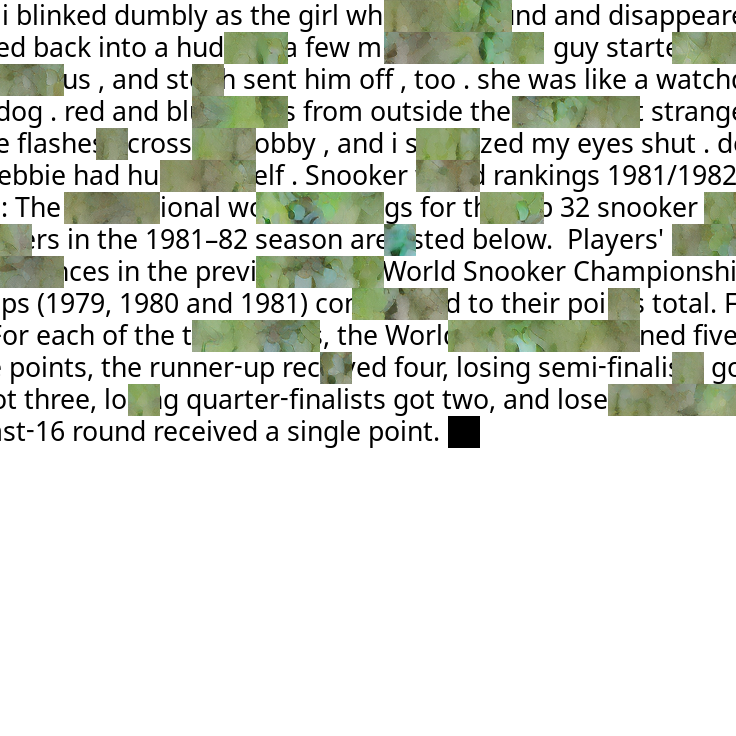

In [23]:
recon.to_PIL()[0]

In [6]:
data_paths = ['storage/enwiki', 'storage/bookcorpus']
loader = get_pixel_pretrain_dataloader(
    paths=data_paths,
    batch_size=64,
    num_workers=1,
    seed=42,
    model_type=None,
    pin_memory_device='cpu',
    streaming=True
)

Datasets loaded from ['storage/bookcorpus', 'storage/enwiki']
Convert the dataset into a streaming dataset
128
128
Begin to interleave datasets
128
128


In [7]:
it = iter(loader)
for i in tqdm(range(300)):
    batch = next(it)
    # batch.to_device('cuda')
    # batch.to_SD()

pid 498435's current affinity mask: 1000000001
pid 498435's new affinity mask: ffffffffff


100%|██████████| 300/300 [01:42<00:00,  2.92it/s]


In [8]:
batch.to_pixel()

tensor([[[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 0.6157,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 0.6157,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 0.6157,  ..., 1